In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

In [2]:
sc.settings.n_jobs = 30
sc.set_figure_params(figsize=(4,4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

# sampleID

In [44]:
adata_hvg = sc.read_h5ad("Input_230907_adata_scvi_random_sampleID.h5ad")

In [55]:
adata_hvg

AnnData object with n_obs × n_vars = 393064 × 5000
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Dataset_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cluster_main_colors', 'hvg', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts'
    obsp: 'connectivities', 'distances'

In [45]:
sc.pp.neighbors(adata_hvg, use_rep="X_scVI_sampleID")

In [46]:
sc.tl.umap(adata_hvg) # 118 m -> 48m -> 10-20m (min_dist = 0.4?)

In [62]:
#sc.tl.leiden(adata_hvg, key_added = "leiden_0.5",resolution=0.5) # 590 m -> 22m -> 7m
sc.tl.leiden(adata_hvg, key_added = "leiden_0.7",resolution=0.7) 
sc.tl.leiden(adata_hvg, key_added = "leiden_1.0",resolution=1.0) 

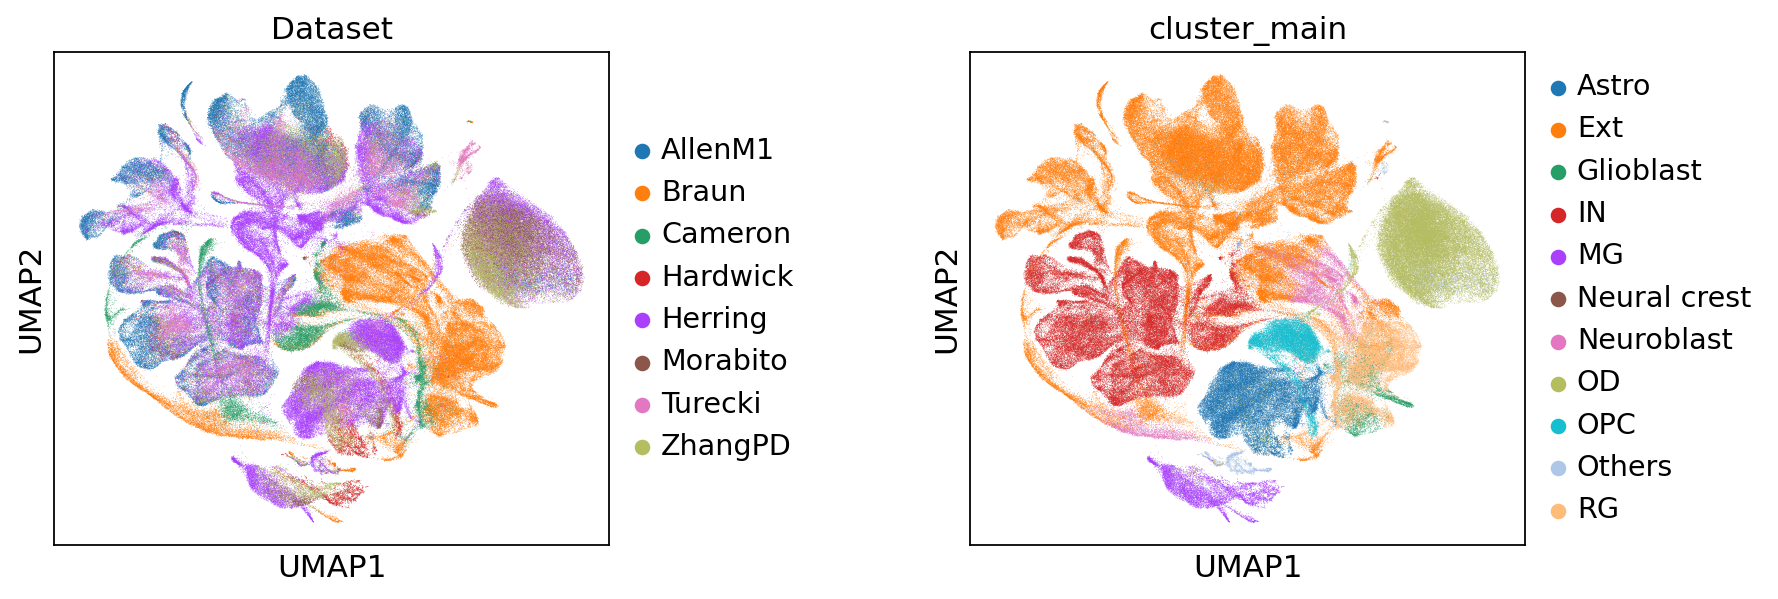

In [52]:
sc.pl.umap(adata_hvg, color=["Dataset", "cluster_main"], ncols=2, wspace = 0.5)

In [24]:
meta = pd.DataFrame(adata_hvg.obs)
meta.columns

Index(['batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI',
       'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis',
       'DF_classification', 'cluster_original', 'cluster_main', 'n_genes',
       'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt',
       'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch',
       '_scvi_labels'],
      dtype='object')

In [53]:
adata_hvg.obs["Dataset"].value_counts()

Herring     143846
AllenM1      74482
Braun        68108
ZhangPD      33103
Turecki      22124
Morabito     20720
Cameron      17033
Hardwick     13648
Name: Dataset, dtype: int64

In [54]:
adata_hvg.obs["Stage2"].value_counts()

Adult (40-60Y)           74482
Fetal (1st trimester)    68108
Adult (60-80Y)           55502
Adult (20-40Y)           45656
Neonatal                 37254
Fetal (2nd trimester)    35183
Childhood (1-6Y)         30726
Adolescence (12-20Y)     14010
Childhood (6-12Y)        13739
Adult (>80Y)             11969
Fetal (3rd trimester)     6435
Name: Stage2, dtype: int64

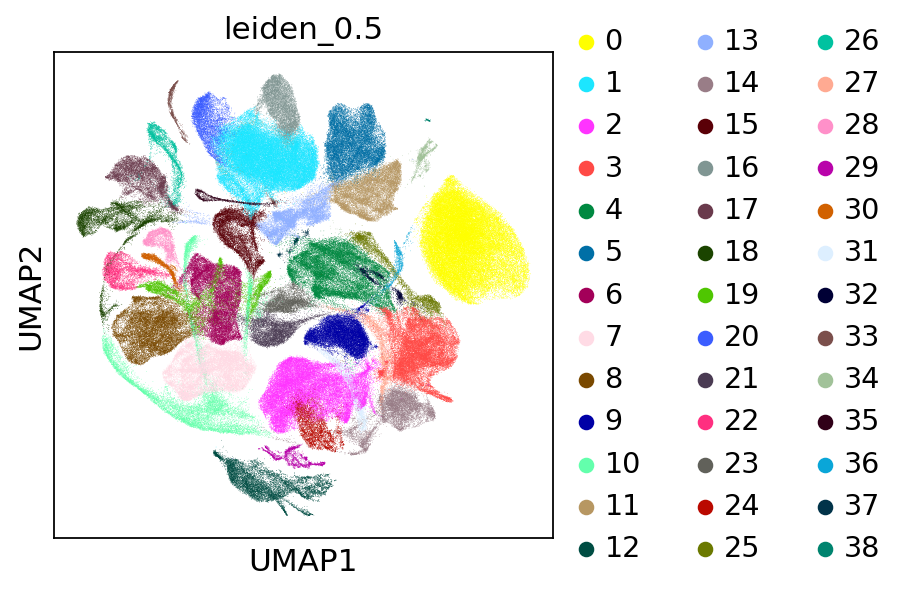

In [63]:
sc.pl.umap(adata_hvg, color=["leiden_0.5"], ncols=2, wspace = 0.5)

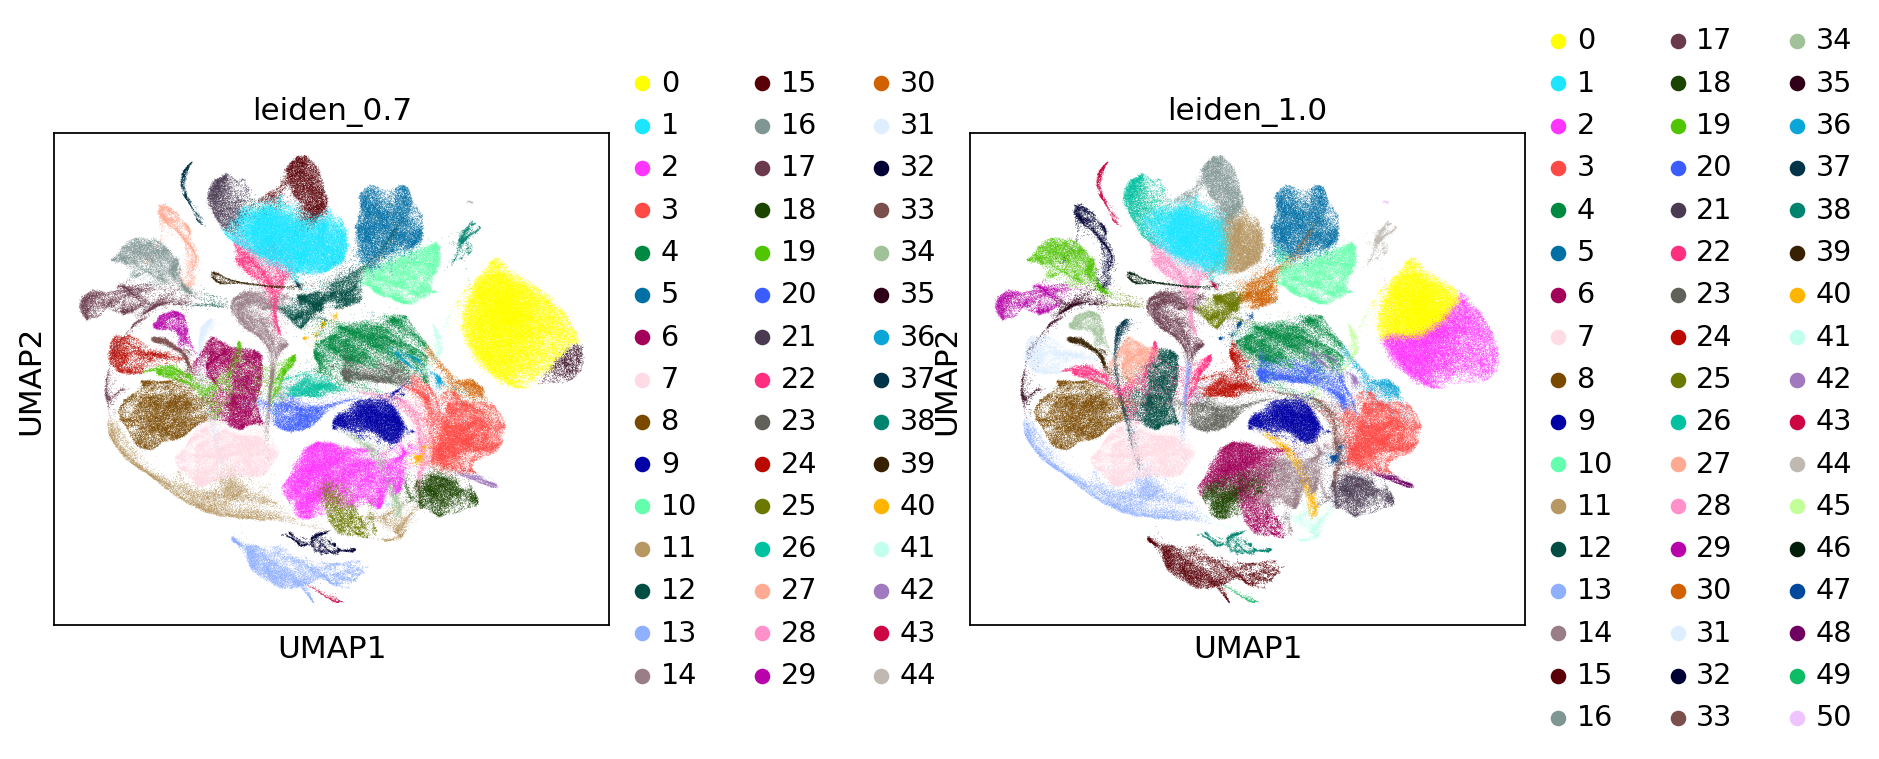

In [65]:
sc.pl.umap(adata_hvg, color=["leiden_0.7", "leiden_1.0"], ncols=2, wspace = 0.5)

In [66]:
adata_hvg.write_h5ad("Output_230907_adata_scvi_random_sampleID.h5ad")